In [56]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.cluster import hierarchy

In [57]:
dfmovies = pandas.read_csv('../datasets/movies/movies_description.txt', sep='|', header=None)
dfusers = pandas.read_csv('../datasets/movies/users_description.txt', sep='|', header=None)
dfscores = pandas.read_csv('../datasets/movies/movies_users.txt',sep='\t', header=None)

In [58]:
dfusers.head()
nusers = len(dfmovies.values)
nmovies = len(dfmovies.values)
print('nusers', nusers)
print('nmovies', nmovies)

nusers 1682
nmovies 1682


In [59]:
'''
    Matriz: contiene 5 en la casilla del usuario i que calificó con 5 la pelicula j 
m  u s e r s
o ij
v
i
e
s

'''

evaluations = np.zeros((nmovies,nusers))
evaluations[ dfscores.values[:,1]-1, dfscores.values[:,0]-1] = dfscores.values[:,2]

dfevaluations = pandas.DataFrame(evaluations, index=dfmovies.values[:,1], columns=np.arange(nusers)+1)
dfevaluations


,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
Toy Story (1995),5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GoldenEye (1995),3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Four Rooms (1995),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Get Shorty (1995),3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Copycat (1995),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B. Monkey (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sliding Doors (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You So Crazy (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtering

In [60]:
tmovies = np.array(list(dfevaluations.index))
idusers = dfevaluations.columns
for i in range(nmovies):
    tmovies[i] = tmovies[i][:10]
print(tmovies[:5])

['Toy Story ' 'GoldenEye ' 'Four Rooms' 'Get Shorty' 'Copycat (1']


In [61]:
bevaluations = evaluations!=0 #0:no hubo evaluación, 1:sí hubo evaluación

neval = np.sum(bevaluations, axis=1)
idx = np.argsort(neval)[::-1] #argsort regresa índices, [::-1] mayor a menor
print(idx) #la menos evaluada es la 1681
idx = idx[:50] #primeras 50 películas más evaluadas

evaluations = evaluations[idx,:]
tmovies = tmovies[idx]

[  49  257   99 ... 1446  813 1681]


In [62]:
neval = np.sum(bevaluations, axis=0)
idx = np.argsort(neval)[::-1] #argsort regresa índices, [::-1] mayor a menor
idx = idx[:50] #primeras 50 películas más evaluadas

evaluations = evaluations[:,idx]
idusers = idusers[idx]

In [63]:
dfevaluations = pandas.DataFrame(evaluations, index=tmovies,columns=idusers)
dfevaluations

,405,655,13,450,276,416,537,303,234,393,...,269,727,399,642,916,145,363,650,151,524
Star Wars,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,...,3.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
Contact (1,0.0,2.0,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,...,0.0,2.0,0.0,3.0,0.0,4.0,3.0,3.0,5.0,0.0
Fargo (199,0.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,1.0,...,5.0,2.0,3.0,0.0,5.0,5.0,5.0,4.0,3.0,5.0
Return of,5.0,3.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,4.0,...,2.0,3.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,3.0
Liar Liar,0.0,3.0,2.0,4.0,4.0,4.0,1.0,4.0,3.0,4.0,...,0.0,4.0,0.0,5.0,0.0,4.0,0.0,3.0,0.0,0.0
English Pa,0.0,3.0,3.0,4.0,0.0,5.0,3.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3.0,0.0,3.0,5.0,5.0
Scream (19,5.0,3.0,1.0,3.0,4.0,5.0,2.0,4.0,3.0,3.0,...,0.0,0.0,3.0,1.0,0.0,0.0,4.0,3.0,0.0,0.0
Toy Story,0.0,2.0,3.0,4.0,5.0,5.0,2.0,5.0,3.0,3.0,...,0.0,3.0,4.0,5.0,4.0,3.0,2.0,3.0,5.0,0.0
Air Force,0.0,3.0,1.0,4.0,4.0,4.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0
Independen,0.0,3.0,5.0,3.0,4.0,5.0,1.0,3.0,0.0,4.0,...,1.0,4.0,3.0,5.0,3.0,2.0,2.0,3.0,5.0,0.0


# Principal Component Analysis

In [64]:
X = evaluations
n = len(X)

In [65]:
model = PCA()
model.fit(X)
X2 = model.transform(X)
X2 = X2[:,:2]

|b

[0.24 0.09 0.08 0.07 0.05 0.05 0.04 0.04 0.03 0.03 0.03 0.03 0.02 0.02
 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


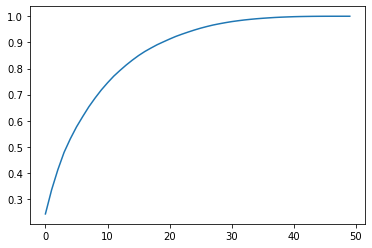

In [66]:
exp_var = model.explained_variance_ratio_
print(np.round(exp_var,2))
exp_var_acum = np.cumsum(exp_var)
plt.figure()
plt.plot(exp_var_acum)
plt.show()

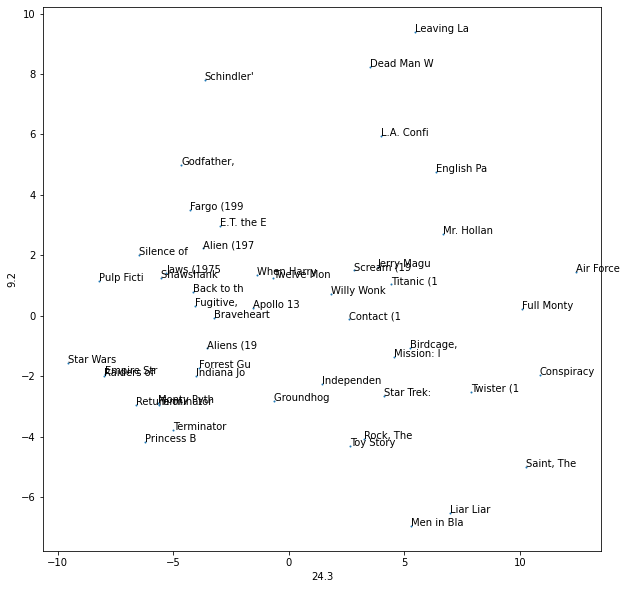

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(X2[:,0], X2[:,1],s=1)
for i in range(n):
    plt.text(X2[i,0], X2[i,1], tmovies[i])
plt.xlabel(np.round(exp_var[0],3)*100)
plt.ylabel(np.round(exp_var[1],3)*100)
plt.show()

# MDS

In [68]:

model = MDS(n_components = 2)
X2 = model.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


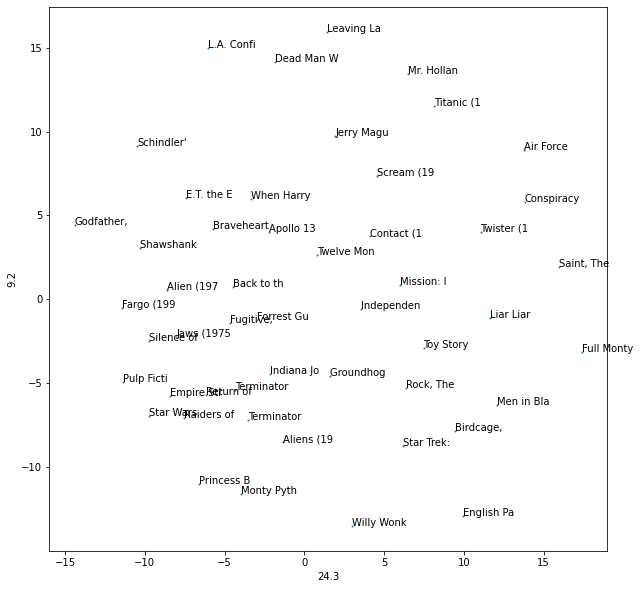

In [70]:
plt.figure(figsize = (10, 10))
plt.scatter(X2[:, 0], X2[:, 1], s = 1)
for i in range(n):
	plt.text(X2[i, 0], X2[i, 1], tmovies[i])
plt.xlabel(np.round(exp_var[0], 3)*100)
plt.ylabel(np.round(exp_var[1], 3)*100)
plt.show()